In [7]:
import torch
import time
import matplotlib.pyplot as plt
import numpy as np
import os

# Model Sensitivity Analysis (PPSO, SGD, Adam)

In [16]:
os.chdir("../PSO-for-NNs")  # Change to the root directory of the project
os.getcwd()

'c:\\Users\\st022\\OneDrive\\Documents\\Carnegie_Mellon\\Spring2025\\optim\\PSO-for-NNs'

In [17]:
from models.mlp import MLP
from trainers.train_pso import train_pso
from trainers.train_sgd_adam import train_gd
from data.data import load_ucidata

In [18]:
# load the digits dataset
data = "wine"
model_size = {
    'small' : [16],
    'medium': [16, 32, 16],
    'large': [16, 32, 64, 32, 16],
}
optimizers = ['SGD', 'Adam', 'PPSO']
output = "results_dir"

In [19]:
def get_convergence_epoch(history, thresh=1e-4, window=20):
    """
    Get the epoch at which the loss converges.
    """
    for i in range(len(history) - window):
        segment = history[i:i + window]
        if max(segment) - min(segment) < thresh:
            return i + window
    return len(history)

In [20]:
def plot_model_comparison(size_label, results):
    plt.figure(figsize=(14, 5))
    
    # Loss subplot
    plt.subplot(1, 2, 1)
    for opt, metrics in results.items():
        plt.plot(metrics["loss_history"], label=opt)
    plt.title(f"{size_label} Model - Loss vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
    # Accuracy subplot
    plt.subplot(1, 2, 2)
    for opt, metrics in results.items():
        plt.plot(metrics["accuracy_history"], label=opt)
    plt.title(f"{size_label} Model - Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

load the dataset digits from UC Irvine 7K+ 8x8 images, 10 labels

In [21]:
train_loader, test_loader, inp_dim, out_dim = load_ucidata(data)

## Experiment Set Up

In [22]:
loss = torch.nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [29]:
os.getcwd()

'c:\\Users\\st022\\OneDrive\\Documents\\Carnegie_Mellon\\Spring2025\\optim\\PSO-for-NNs'


--- Training small model ---
[SGD] Epoch 0: Loss = 5.6321, Accuracy = 0.1761
[SGD] Epoch 50: Loss = 5.5523, Accuracy = 0.1690
[SGD] Epoch 100: Loss = 5.4449, Accuracy = 0.2746
[SGD] Epoch 150: Loss = 5.3894, Accuracy = 0.4155
[SGD] Epoch 200: Loss = 5.2728, Accuracy = 0.4648
[SGD] Epoch 250: Loss = 5.2037, Accuracy = 0.4648
[SGD] Epoch 300: Loss = 5.1358, Accuracy = 0.4930
[SGD] Epoch 350: Loss = 5.0415, Accuracy = 0.5493
[SGD] Epoch 400: Loss = 4.9324, Accuracy = 0.5704
[SGD] Epoch 450: Loss = 4.8324, Accuracy = 0.6268
[Adam] Epoch 0: Loss = 5.5824, Accuracy = 0.3169
[Adam] Epoch 50: Loss = 1.3168, Accuracy = 0.9859
[Adam] Epoch 100: Loss = 0.4232, Accuracy = 0.9930
[Adam] Epoch 150: Loss = 0.2491, Accuracy = 0.9930
[Adam] Epoch 200: Loss = 0.2075, Accuracy = 0.9930
[Adam] Epoch 250: Loss = 0.1456, Accuracy = 0.9930
[Adam] Epoch 300: Loss = 0.0959, Accuracy = 1.0000
[Adam] Epoch 350: Loss = 0.0829, Accuracy = 1.0000
[Adam] Epoch 400: Loss = 0.0619, Accuracy = 1.0000
[Adam] Epoch 450:

<Figure size 432x288 with 0 Axes>

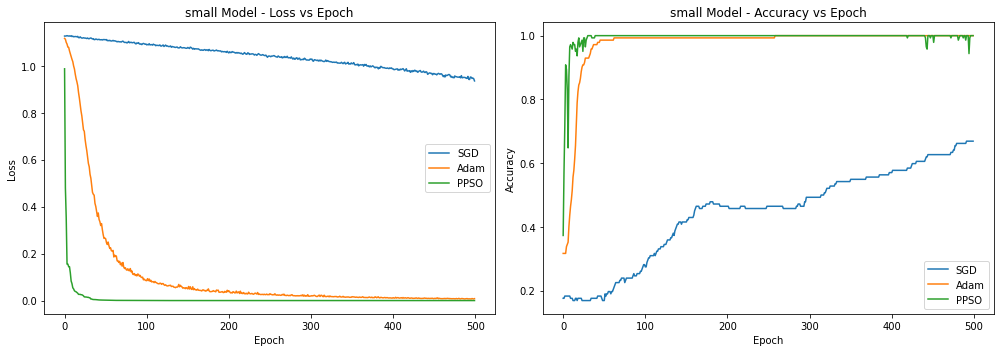


--- Training medium model ---
[SGD] Epoch 0: Loss = 5.6098, Accuracy = 0.2817
[SGD] Epoch 50: Loss = 5.6611, Accuracy = 0.2817
[SGD] Epoch 100: Loss = 5.5510, Accuracy = 0.2817
[SGD] Epoch 150: Loss = 5.5350, Accuracy = 0.2817
[SGD] Epoch 200: Loss = 5.5085, Accuracy = 0.2817
[SGD] Epoch 250: Loss = 5.5072, Accuracy = 0.3310
[SGD] Epoch 300: Loss = 5.4911, Accuracy = 0.4014
[SGD] Epoch 350: Loss = 5.4637, Accuracy = 0.4014
[SGD] Epoch 400: Loss = 5.4819, Accuracy = 0.4014
[SGD] Epoch 450: Loss = 5.4633, Accuracy = 0.4014
[Adam] Epoch 0: Loss = 5.4710, Accuracy = 0.4014
[Adam] Epoch 50: Loss = 0.1394, Accuracy = 0.9930
[Adam] Epoch 100: Loss = 0.0267, Accuracy = 1.0000
[Adam] Epoch 150: Loss = 0.0096, Accuracy = 1.0000
[Adam] Epoch 200: Loss = 0.0052, Accuracy = 1.0000
[Adam] Epoch 250: Loss = 0.0026, Accuracy = 1.0000
[Adam] Epoch 300: Loss = 0.0017, Accuracy = 1.0000
[Adam] Epoch 350: Loss = 0.0014, Accuracy = 1.0000
[Adam] Epoch 400: Loss = 0.0008, Accuracy = 1.0000
[Adam] Epoch 450

<Figure size 432x288 with 0 Axes>

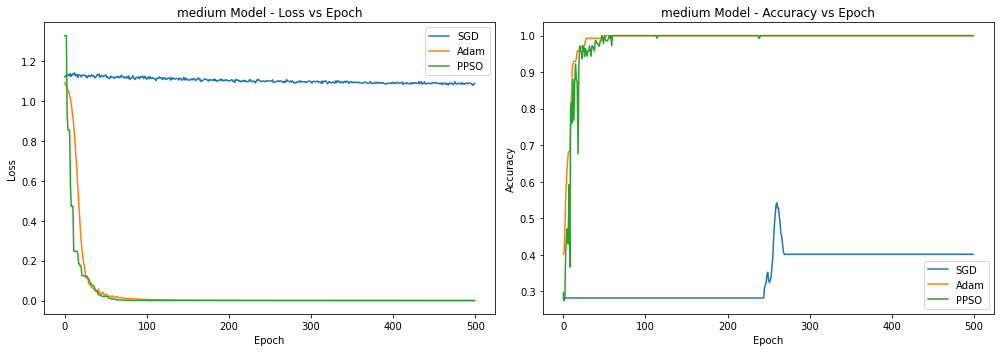


--- Training large model ---
[SGD] Epoch 0: Loss = 5.4978, Accuracy = 0.3169
[SGD] Epoch 50: Loss = 5.4715, Accuracy = 0.3169
[SGD] Epoch 100: Loss = 5.4530, Accuracy = 0.3169
[SGD] Epoch 150: Loss = 5.4781, Accuracy = 0.3239
[SGD] Epoch 200: Loss = 5.4547, Accuracy = 0.4014
[SGD] Epoch 250: Loss = 5.4578, Accuracy = 0.4014
[SGD] Epoch 300: Loss = 5.4319, Accuracy = 0.4014
[SGD] Epoch 350: Loss = 5.4660, Accuracy = 0.4014
[SGD] Epoch 400: Loss = 5.4162, Accuracy = 0.4014
[SGD] Epoch 450: Loss = 5.4264, Accuracy = 0.4014
[Adam] Epoch 0: Loss = 5.4753, Accuracy = 0.4014
[Adam] Epoch 50: Loss = 0.0315, Accuracy = 1.0000
[Adam] Epoch 100: Loss = 0.0029, Accuracy = 1.0000
[Adam] Epoch 150: Loss = 0.0009, Accuracy = 1.0000
[Adam] Epoch 200: Loss = 0.0003, Accuracy = 1.0000
[Adam] Epoch 250: Loss = 0.0001, Accuracy = 1.0000
[Adam] Epoch 300: Loss = 0.0000, Accuracy = 1.0000
[Adam] Epoch 350: Loss = 0.0000, Accuracy = 1.0000
[Adam] Epoch 400: Loss = 0.0000, Accuracy = 1.0000
[Adam] Epoch 450:

<Figure size 432x288 with 0 Axes>

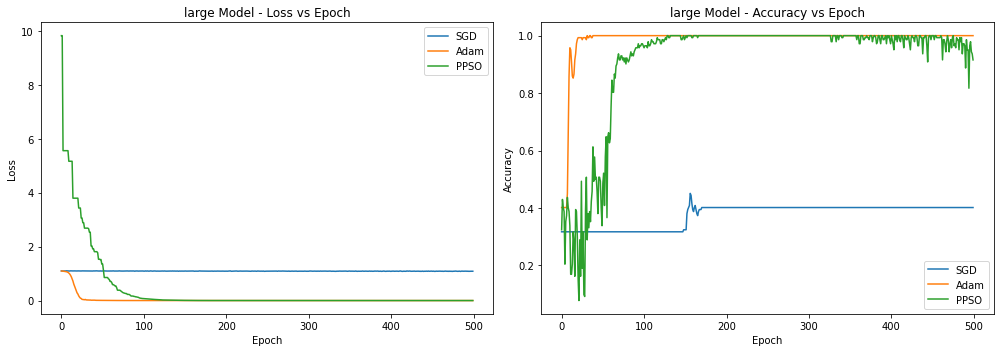

In [27]:
summary = []

for size_name, hiddens in model_size.items():
    results = {}
    print(f"\n--- Training {size_name} model ---")

    for opt in optimizers:
        model = MLP(inp_dim, hiddens, out_dim).to(device)
        start_time = time.time()

        if opt == "PPSO":
            optimizer, _, acc_hist = train_pso(
                model,
                train_loader,
                loss,
                variant=opt,
                num_particles=50,
                num_iterations=500,
                plot_convergence=False,
            )
            loss_hist = optimizer.history
        else:
            model, loss_hist, acc_hist = train_gd(
                model,
                train_loader,
                loss,
                optimizer_type=opt,
                lr=0.001,
                num_epochs=500,
                plot_convergence=False,
            )

        end_time = time.time()
        elapsed_time = end_time - start_time
        final_acc = acc_hist[-1]
        convergence_epoch = get_convergence_epoch(acc_hist)

        summary.append({
            "model_size": size_name,
            "optimizer": opt,
            "final_acc": final_acc,
            "convergence_epoch": convergence_epoch,
            "elapsed_time": elapsed_time,
        })

        results[opt] = {
            "loss_history": loss_hist,
            "accuracy_history": acc_hist
        }

        # Save individual accuracy plots
        plt.plot(acc_hist, label=f"{opt}")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title(f"Accuracy vs Epochs - {opt} - {size_name}")
        plt.legend()
        plt.savefig(f"accuracy_{opt}_{size_name}.png")
        plt.clf()

    # Plot combined loss + accuracy for current model size
    plot_model_comparison(size_name, results)

In [28]:
print("\n--- Summary of Results ---")
for entry in summary:
    print(f"Model Size: {entry['model_size']}, Optimizer: {entry['optimizer']}, "
          f"Final Accuracy: {entry['final_acc']:.4f}, "
          f"Convergence Epoch: {entry['convergence_epoch']}, "
          f"Elapsed Time: {entry['elapsed_time']:.2f} seconds")


--- Summary of Results ---
Model Size: small, Optimizer: SGD, Final Accuracy: 0.6690, Convergence Epoch: 242, Elapsed Time: 4.61 seconds
Model Size: small, Optimizer: Adam, Final Accuracy: 1.0000, Convergence Epoch: 82, Elapsed Time: 5.07 seconds
Model Size: small, Optimizer: PPSO, Final Accuracy: 1.0000, Convergence Epoch: 59, Elapsed Time: 91.36 seconds
Model Size: medium, Optimizer: SGD, Final Accuracy: 0.4014, Convergence Epoch: 20, Elapsed Time: 6.09 seconds
Model Size: medium, Optimizer: Adam, Final Accuracy: 1.0000, Convergence Epoch: 48, Elapsed Time: 8.41 seconds
Model Size: medium, Optimizer: PPSO, Final Accuracy: 1.0000, Convergence Epoch: 80, Elapsed Time: 118.75 seconds
Model Size: large, Optimizer: SGD, Final Accuracy: 0.4014, Convergence Epoch: 20, Elapsed Time: 8.26 seconds
Model Size: large, Optimizer: Adam, Final Accuracy: 1.0000, Convergence Epoch: 58, Elapsed Time: 12.70 seconds
Model Size: large, Optimizer: PPSO, Final Accuracy: 0.9155, Convergence Epoch: 186, Ela